Els cinc grans trets de personalitat, també coneguts com el model de cinc factors (FFM) i el model OCEAN, és una taxonomia, o agrupació, per als trets de personalitat. Quan s'aplica l'anàlisi de factors (una tècnica estadística) a les dades de l'enquesta de personalitat, algunes paraules utilitzades per descriure aspectes de la personalitat s'apliquen sovint a la mateixa persona. Per exemple, és més probable que algú descrit com a conscient sigui descrit com "sempre preparat" en lloc de "maldestre". Aquesta teoria es basa, per tant, en l'associació entre paraules però no en experiments neuropsicològics. Aquesta teoria utilitza descriptors del llenguatge comú i, per tant, suggereix cinc grans dimensions comunament utilitzades per descriure la personalitat humana i la psique.

La idea és que amb aquest conjunt de dades, que conté respostes de 1-5 (1=Desgrau, 3=Neutral, 5=Acord) a diverses preguntes, es classifiqui cada persona segons els 5 trets del model Big Five, utilitzant un enfocament de classificació que agrupa les persones en categories en funció de les seves puntuacions. Per a això, definirem un llindar per a quantificar la presència de cada tret de personalitat en diferents individus: Baix, Mitjà, Alt. Com quantificarem aquest llindar? Utilitzant percentils. 

Els rags de personalitat corresponen al model dels "Big Five":<br>
    EXT: Extraversió.<br>
    EST: Estabilitat emocional (Neuroticismo invers).<br>
    AGR: Amabilitat.<br>
    CSN: Escrupolositat.<br>
    OPN: Obertura a l'experiència.<br>

1. LIBRARIES IMPORTATION AND DATA READING

In [2]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Machine Learning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluación de modelos
from sklearn.metrics import accuracy_score, f1_score, classification_report, r2_score, confusion_matrix, ConfusionMatrixDisplay, average_precision_score, precision_recall_curve, auc, roc_curve, roc_auc_score

# Análisis de componentes principales (PCA)
from sklearn.decomposition import PCA

# Estadísticas

import statsmodels.api as sm
import matplotlib.pyplot as bplt

In [3]:
dataset = pd.read_csv(f'C:/Users/adria/OneDrive/Escritorio/MatCAD/3º/1ºCuatri/Aprenentatge Computacional/Cas Kaggle/data-final.csv', delimiter='\t', encoding='utf-8')

In [4]:
print("\nMirem descripció general:")
dataset.describe()


Mirem descripció general:


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,...,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013275e+06,1.013275e+06,1.013275e+06,1.013558e+06,1.015341e+06,1.015341e+06
mean,2.648067e+00,2.773115e+00,3.288349e+00,3.140595e+00,3.276960e+00,2.401100e+00,2.771744e+00,3.414818e+00,2.963740e+00,3.556469e+00,...,7.689488e+03,5.423945e+03,6.325802e+03,5.336311e+03,1.149510e+03,8.262611e+02,9.590748e+02,6.754233e+02,2.701410e+03,1.045211e+01
std,1.264407e+00,1.323943e+00,1.215006e+00,1.237442e+00,1.277593e+00,1.225721e+00,1.400336e+00,1.271915e+00,1.346040e+00,1.305232e+00,...,5.841987e+05,2.629748e+05,4.298906e+05,4.408225e+05,5.600884e+02,1.802490e+02,5.104005e+04,2.017864e+04,1.483898e+06,3.982879e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-6.181300e+04,-5.001200e+04,-9.598600e+04,-3.594871e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,...,2.279000e+03,2.144000e+03,2.329000e+03,1.484000e+03,4.140000e+02,7.200000e+02,5.000000e+00,1.710000e+02,9.000000e+00,1.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,3.208000e+03,3.051000e+03,3.269000e+03,2.192000e+03,1.366000e+03,7.680000e+02,1.000000e+01,2.240000e+02,1.300000e+01,1.000000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,...,4.729000e+03,4.469000e+03,4.785000e+03,3.362000e+03,1.440000e+03,9.000000e+02,3.000000e+01,3.130000e+02,1.800000e+01,2.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,3.891434e+08,1.696693e+08,3.470326e+08,3.344289e+08,1.366000e+04,8.802000e+03,2.944307e+07,1.189272e+07,1.493327e+09,7.250000e+02


In [5]:
print("Número d'atributs del dataset:", len(dataset.keys()))
print("Número de files en el dataset: ",dataset.shape[0])

print("\nAtributs del dataset i el seu tipus:")
print (dataset.dtypes) 

Número d'atributs del dataset: 110
Número de files en el dataset:  1015341

Atributs del dataset i el seu tipus:
EXT1                     float64
EXT2                     float64
EXT3                     float64
EXT4                     float64
EXT5                     float64
                          ...   
endelapse                  int64
IPC                        int64
country                   object
lat_appx_lots_of_err      object
long_appx_lots_of_err     object
Length: 110, dtype: object


Com realment no queda clar quin és el significat de cada atribut, crearem un algorisme amb el qual l'usuari pugui comprovar que vol dir cadascun d'ells

In [6]:
# Clean text from invisible characters
def cleaning(text):
    # Replace tabs and other invisible characters with spaces
    return text.replace("\t", " ").replace("\n", " ").strip()

# Load the questions and their descriptions into a dictionary
def questions(file):
    qts = {}
    with open(file, 'r', encoding='utf-8') as file:
        for line in file:
            if line.strip():  # Ignore empty lines
                clean_line = cleaning(line)
                # Split by spaces or tabs to get key and description
                sections = clean_line.split(maxsplit=1)
                if len(sections) == 2:
                    key, description = sections
                    qts[key.strip()] = description.strip()  # Normalize spaces
    return qts

# Look up the meaning of a key
def meaning(questions):
    while True:
        keys = input("Enter the key that you want to know (or type 'leave' to finish): ").strip()
        if keys.lower() == 'leave':
            print("Search finished.")
            break
        elif keys in questions:
            print(f"{keys}: {questions[keys]}")
        else:
            print(f"The key '{keys}' is not in the file. Please try again.")

# Path to the Questions.txt file
file = "C:/Users/adria/OneDrive/Escritorio/MatCAD/3º/1ºCuatri/Aprenentatge Computacional/Cas Kaggle/Questions.txt"

try:
    # Load the questions
    questions = questions(file)
    print("The questions have been loaded successfully.")
    # Start the interactive search
    meaning(questions)
except FileNotFoundError:
    print(f"The file '{file}' was not found.")
except Exception as e:
    print(f"Error: {e}")


The questions have been loaded successfully.


Search finished.


In [7]:
numeric_features = dataset.select_dtypes(np.number).keys()
non_numeric = [k for k in dataset.keys() if k not in numeric_features]
print("Numeric features: ", numeric_features)
print("Non numeric features: ", non_numeric)
print(dataset[non_numeric].dtypes)

Numeric features:  Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E', 'screenw', 'screenh',
       'introelapse', 'testelapse', 'endelapse', 'IPC'],
      dtype='object', length=106)
Non numeric features:  ['dateload', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err']
dateload                 object
country                  object
lat_appx_lots_of_err     object
long_appx_lots_of_err    object
dtype: object


Miraremos de hacer el cambio de las variables categóricas a numéricas

In [8]:
# Imprimir las columnas con NaNs
nan_columns = dataset.columns[dataset.isna().sum() > 0].tolist()
print("NÚMERO DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum())

# Imprimir el porcentaje de NaNs por columna
print("\nPORCENTAJES DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum() / len(dataset) * 100)

# Seleccionar columnas sin NaNs
non_nan_columns = dataset.columns[dataset.isna().sum() == 0].tolist()

# Imprimir columnas sin NaNs
print("\nCOLUMNAS SIN NANS:")
print(non_nan_columns)


NÚMERO DE NANS POR COLUMNA:
EXT1           1783
EXT2           1783
EXT3           1783
EXT4           1783
EXT5           1783
               ... 
screenw        2066
screenh        2066
introelapse    2066
testelapse     1783
country          77
Length: 105, dtype: int64

PORCENTAJES DE NANS POR COLUMNA:
EXT1           0.175606
EXT2           0.175606
EXT3           0.175606
EXT4           0.175606
EXT5           0.175606
                 ...   
screenw        0.203478
screenh        0.203478
introelapse    0.203478
testelapse     0.175606
country        0.007584
Length: 105, dtype: float64

COLUMNAS SIN NANS:
['dateload', 'endelapse', 'IPC', 'lat_appx_lots_of_err', 'long_appx_lots_of_err']


Hi ha molts Nans, per tant més endavant haurem de fer canvis. principalment el que farem serà dividir en blocs diferents depenen del significat de la columna. També haurem de comprovar que en les 50 columnes que representen els enunciats als quals los enquestats responen, sol hagi valors del 1-5.

In [9]:
# Lista de las 50 columnas a comprobar 
columns_bloc1 = ["EXT1", "EXT2", "EXT3", "EXT4", "EXT5", "EXT6", "EXT7", "EXT8", "EXT9", "EXT10",
           "EST1", "EST2", "EST3", "EST4", "EST5", "EST6", "EST7", "EST8", "EST9", "EST10",
           "AGR1", "AGR2", "AGR3", "AGR4", "AGR5", "AGR6", "AGR7", "AGR8", "AGR9", "AGR10",
           "CSN1", "CSN2", "CSN3", "CSN4", "CSN5", "CSN6", "CSN7", "CSN8", "CSN9", "CSN10",
           "OPN1", "OPN2", "OPN3", "OPN4", "OPN5", "OPN6", "OPN7", "OPN8", "OPN9", "OPN10"]

# Verificar si todos los valores en las columnas están dentro del rango [1, 2, 3, 4, 5]
# Mostrar los valores únicos de cada columna
unique_values_summary = {col: dataset[col].unique() for col in columns_bloc1}

# Mostrar los valores únicos de cada columna
for column, unique_values in unique_values_summary.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {unique_values}")
    print("-" * 40)


Columna: EXT1
Valores únicos: [ 4.  3.  2.  1.  5.  0. nan]
----------------------------------------
Columna: EXT2
Valores únicos: [ 1.  5.  3.  2.  4.  0. nan]
----------------------------------------
Columna: EXT3
Valores únicos: [ 5.  3.  4.  2.  1.  0. nan]
----------------------------------------
Columna: EXT4
Valores únicos: [ 2.  4.  3.  5.  1.  0. nan]
----------------------------------------
Columna: EXT5
Valores únicos: [ 5.  3.  4.  2.  1.  0. nan]
----------------------------------------
Columna: EXT6
Valores únicos: [ 1.  3.  2.  5.  4.  0. nan]
----------------------------------------
Columna: EXT7
Valores únicos: [ 5.  2.  1.  3.  4.  0. nan]
----------------------------------------
Columna: EXT8
Valores únicos: [ 2.  5.  3.  4.  1.  0. nan]
----------------------------------------
Columna: EXT9
Valores únicos: [ 4.  1.  2.  3.  5.  0. nan]
----------------------------------------
Columna: EXT10
Valores únicos: [ 1.  5.  4.  3.  2.  0. nan]
------------------------------

Usarem la moda per imputer els valors faltants, ja que així respectem la naturalesa ordinal de les dades, també mantenim valors que realment estan dins del rang [1, 5] i fins i tot evitem introduir biaixos numèrics o inconsistències.

In [10]:
# Reemplazar los valores NaN solo en las columnas de rasgos
for columna in columns_bloc1:
    dataset[columna] = dataset[columna].replace(np.nan, 0)

# Imputación simple NO ES EFICIENTE USAR LA MODA
# imputer_mode = SimpleImputer(strategy='most_frequent')  
# dataset.loc[:, columns_bloc1] = imputer_mode.fit_transform(dataset[columns_bloc1])

# Verificar la proporción de NaNs
# Seleccionar columnas sin NaNs
non_nan_columns = dataset.columns[dataset.isna().sum() == 0].tolist()

# Mostrar los valores únicos de cada columna
unique_values_summary = {col: dataset[col].unique() for col in columns_bloc1}

# Mostrar los valores únicos de cada columna
for column, unique_values in unique_values_summary.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {unique_values}")
    print("-" * 40)
    

Columna: EXT1
Valores únicos: [4. 3. 2. 1. 5. 0.]
----------------------------------------
Columna: EXT2
Valores únicos: [1. 5. 3. 2. 4. 0.]
----------------------------------------
Columna: EXT3
Valores únicos: [5. 3. 4. 2. 1. 0.]
----------------------------------------
Columna: EXT4
Valores únicos: [2. 4. 3. 5. 1. 0.]
----------------------------------------
Columna: EXT5
Valores únicos: [5. 3. 4. 2. 1. 0.]
----------------------------------------
Columna: EXT6
Valores únicos: [1. 3. 2. 5. 4. 0.]
----------------------------------------
Columna: EXT7
Valores únicos: [5. 2. 1. 3. 4. 0.]
----------------------------------------
Columna: EXT8
Valores únicos: [2. 5. 3. 4. 1. 0.]
----------------------------------------
Columna: EXT9
Valores únicos: [4. 1. 2. 3. 5. 0.]
----------------------------------------
Columna: EXT10
Valores únicos: [1. 5. 4. 3. 2. 0.]
----------------------------------------
Columna: EST1
Valores únicos: [1. 2. 4. 3. 5. 0.]
---------------------------------------

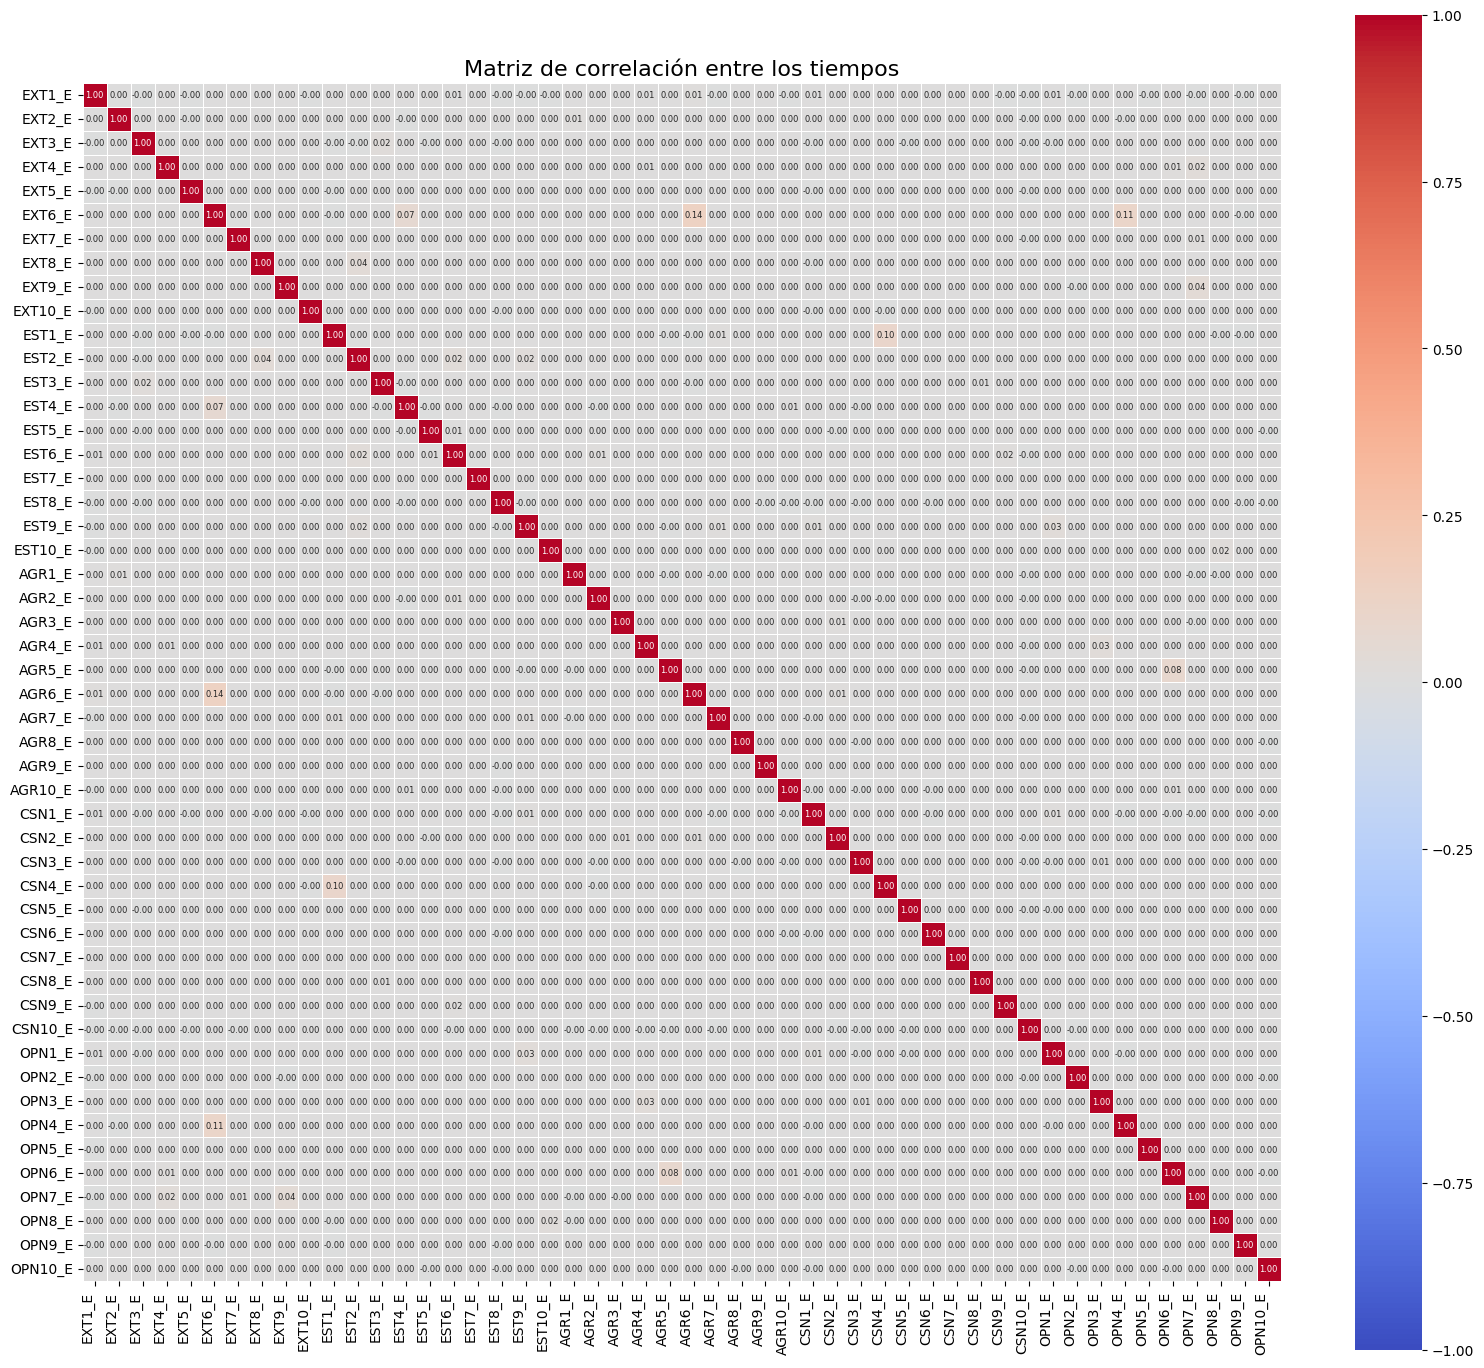

In [11]:
# Llista de les columnes a tractar
columns_bloc_temps = [
    "EXT1_E", "EXT2_E", "EXT3_E", "EXT4_E", "EXT5_E", "EXT6_E", "EXT7_E", "EXT8_E", "EXT9_E", "EXT10_E",
    "EST1_E", "EST2_E", "EST3_E", "EST4_E", "EST5_E", "EST6_E", "EST7_E", "EST8_E", "EST9_E", "EST10_E",
    "AGR1_E", "AGR2_E", "AGR3_E", "AGR4_E", "AGR5_E", "AGR6_E", "AGR7_E", "AGR8_E", "AGR9_E", "AGR10_E",
    "CSN1_E", "CSN2_E", "CSN3_E", "CSN4_E", "CSN5_E", "CSN6_E", "CSN7_E", "CSN8_E", "CSN9_E", "CSN10_E",
    "OPN1_E", "OPN2_E", "OPN3_E", "OPN4_E", "OPN5_E", "OPN6_E", "OPN7_E", "OPN8_E", "OPN9_E", "OPN10_E"]

# Seleccionar las columnas de interés
data_temps = dataset[columns_bloc_temps]

# Calcular la matriz de correlación
correlation_matrix = data_temps.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(16, 14))  # Ajustar tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5,
            square=True, vmin=-1, vmax=1, annot_kws={'size': 6})  # Ajustar el tamaño de los números

# Mejorar la legibilidad de las etiquetas
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotar las etiquetas del eje X
plt.yticks(rotation=0, ha='right', fontsize=10)   # Rotar las etiquetas del eje Y

# Título y mostrar el gráfico
plt.title("Matriz de correlación entre los tiempos", fontsize=16)
plt.tight_layout()  # Asegura que todo se vea correctamente
plt.show()

Podem afirmar que no hi ha cap tipus de correlació de los temps de resposta, doncs per tractar els Nans usarem ImputacióSimple altre cop, però com els temps de resposta poden variar significativament entre els participants, en lloc de usar la moda usarem la imputació per mitjana ja que garanteix que els valors imputats no es vegin esbiaixats per temps extrems, preservant així l'estabilitat de les dades.

In [12]:
# Imputación simple
imputer_mode = SimpleImputer(strategy='median')  # Para valores numéricos
dataset.loc[:, columns_bloc_temps] = imputer_mode.fit_transform(dataset[columns_bloc_temps])

In [13]:
dataset.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [14]:
# Imprimir las columnas con NaNs
nan_columns = dataset.columns[dataset.isna().sum() > 0].tolist()
print("NÚMERO DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum())

# Imprimir el porcentaje de NaNs por columna
print("\nPORCENTAJES DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum() / len(dataset) * 100)

# Seleccionar columnas sin NaNs
non_nan_columns = dataset.columns[dataset.isna().sum() == 0].tolist()

# Imprimir columnas sin NaNs
print("\nCOLUMNAS SIN NANS:")
print(non_nan_columns)

NÚMERO DE NANS POR COLUMNA:
screenw        2066
screenh        2066
introelapse    2066
testelapse     1783
country          77
dtype: int64

PORCENTAJES DE NANS POR COLUMNA:
screenw        0.203478
screenh        0.203478
introelapse    0.203478
testelapse     0.175606
country        0.007584
dtype: float64

COLUMNAS SIN NANS:
['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E', 'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'A

Estrategia que seguiremos para imputar los valores:<br>

introelapse: Imputación por mediana	Preserva la tendencia central en tiempos de respuesta.<br>

testelapse:	Imputación por mediana	Robustez frente a valores extremos en tiempos.<br>

country:	Imputación por moda	La proporción de NaNs es muy baja y es una variable categórica.<br>

lat_appx_lots_of_err:	Eliminar columna	Datos imprecisos y no confiables, además de tener poca utilidad analítica.<br>
long_appx_lots_of_err:	Eliminar columna	Mismo caso que lat_appx_lots_of_err.<br>

screen_size:	Imputación por mediana	Consistente con la naturaleza de distribuciones de tamaños de pantalla.<br>

dateload_seconds:	Imputación por mediana	Valores faltantes mínimos; la imputación asegura consistencia.<br>

In [15]:
# Blocs de atributs
columns_bloc_median = ["introelapse", "testelapse", "screen_size", "dateload_time"]
columns_bloc_moda = ["country"]

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Aplicar el LabelEncoder a la columna 'country'
dataset['country'] = le.fit_transform(dataset['country'])

# Convertir las columnas 'lat_appx_lots_of_err' y 'long_appx_lots_of_err' a tipo numérico
# Usamos pd.to_numeric() para manejar valores no numéricos, convirtiéndolos a NaN si es necesario

dataset['lat_appx_lots_of_err'] = pd.to_numeric(dataset['lat_appx_lots_of_err'], errors='coerce')
dataset['long_appx_lots_of_err'] = pd.to_numeric(dataset['long_appx_lots_of_err'], errors='coerce')

#fusionem les variables per crear el tamany de pantalla
dataset['screen_size'] = dataset['screenh'] * dataset['screenw']
dataset.drop(columns=['screenw', 'screenh'], inplace=True)
dataset.head()

# Extraer el tiempo (HH:MM:SS) de la columna 'dateload'
dataset['dateload_spent'] = dataset['dateload'].str.split(' ').str[1]

# Convertir 'dateload_time' en segundos
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

dataset['dateload_time'] = dataset['dateload_spent'].apply(time_to_seconds)

# Eliminar las columnas innecesarias
dataset.drop(columns=['dateload', 'dateload_spent'], inplace=True)

dataset.head()

# Imputación simple

# mediana
imputer_median2 = SimpleImputer(strategy='median')  # Para valores numéricos
dataset.loc[:, columns_bloc_median] = imputer_median2.fit_transform(dataset[columns_bloc_median])

#moda
imputer_moda = SimpleImputer(strategy='median')  # Para valores numéricos
dataset.loc[:, columns_bloc_moda] = imputer_moda.fit_transform(dataset[columns_bloc_moda])

# Eliminar las columnas lat_appx_lots_of_err y long_appx_lots_of_err
dataset = dataset.drop(columns=['lat_appx_lots_of_err', 'long_appx_lots_of_err'])

# Verificar que las columnas han sido eliminadas
dataset.head()


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN8_E,OPN9_E,OPN10_E,introelapse,testelapse,endelapse,IPC,country,screen_size,dateload_time
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,3116.0,2992.0,4354.0,9.0,234.0,6,1,69,786432.0,7261
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,3374.0,3096.0,3019.0,12.0,179.0,11,1,144,1044480.0,7280
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,6295.0,1585.0,2529.0,3.0,186.0,7,1,69,1049088.0,7316
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4192.0,3480.0,3257.0,186.0,219.0,7,1,69,2304000.0,7322
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5320.0,11401.0,8642.0,8.0,315.0,17,2,103,1049088.0,7377


Ahora procederemos a crear el umbral para clasificar las diferentes personalidades:

In [ ]:
def classify_personality(score):
    if score < 2.75:  
        return "Baja"
    elif 2.75 <= score <= 3.25:  
        return "Media"
    else:  
        return "Alta"

rasgos = {
    'EXT': ["EXT1", "EXT2", "EXT3", "EXT4", "EXT5", "EXT6", "EXT7", "EXT8", "EXT9", "EXT10"],
    'EST': ["EST1", "EST2", "EST3", "EST4", "EST5", "EST6", "EST7", "EST8", "EST9", "EST10"],
    'AGR': ["AGR1", "AGR2", "AGR3", "AGR4", "AGR5", "AGR6", "AGR7", "AGR8", "AGR9", "AGR10"],
    'CSN': ["CSN1", "CSN2", "CSN3", "CSN4", "CSN5", "CSN6", "CSN7", "CSN8", "CSN9", "CSN10"],
    'OPN': ["OPN1", "OPN2", "OPN3", "OPN4", "OPN5", "OPN6", "OPN7", "OPN8", "OPN9", "OPN10"]}

# Crear columnas de promedio por rasgo sin contar los ceros
for rasgo, columnas in rasgos.items():
    # Asegurarse de que las columnas existen
    if all(col in dataset.columns for col in columnas):
        # Calcular la media excluyendo los ceros (utilizando una máscara booleana para ignorar los ceros)
        dataset[f"{rasgo}_avg"] = dataset[columnas].apply(lambda row: row[row != 0].mean(), axis=1)

# Aplicar clasificación
dataset['EXT_class'] = dataset['EXT_avg'].apply(lambda x: classify_personality(x))
dataset['EST_class'] = dataset['EST_avg'].apply(lambda x: classify_personality(x))
dataset['AGR_class'] = dataset['AGR_avg'].apply(lambda x: classify_personality(x))
dataset['CSN_class'] = dataset['CSN_avg'].apply(lambda x: classify_personality(x))
dataset['OPN_class'] = dataset['OPN_avg'].apply(lambda x: classify_personality(x))

columns_bloc_rasgos = ["EXT_class", "EST_class", "AGR_class", "CSN_class", "OPN_class"]

# Mostrar los valores únicos de cada columna
unique_values_summary = {col: dataset[col].unique() for col in columns_bloc_rasgos}

# Mostrar los valores únicos de cada columna
for column, unique_values in unique_values_summary.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {unique_values}")
    print("-" * 40)
    
dataset.head()


In [ ]:
# Lista de las columnas de clases
class_columns = ['EXT_class', 'EST_class', 'AGR_class', 'CSN_class', 'OPN_class']

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Definir el mapeo manualmente
class_mapping = {'Baja': 0, 'Media': 1, 'Alta': 2}

for col in class_columns:
    dataset[col + '_num'] = dataset[col].map(class_mapping)

# Verificar el cambio
dataset.drop(columns=['EXT_class', 'EST_class', 'AGR_class', 'CSN_class', 'OPN_class'], inplace=True)
dataset.drop(columns=['EXT_avg', 'EST_avg', 'AGR_avg', 'CSN_avg', 'OPN_avg'], inplace=True)
dataset.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,endelapse,IPC,country,screen_size,dateload_time,EXT_class_num,EST_class_num,AGR_class_num,CSN_class_num,OPN_class_num
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,6,1,69,786432.0,7261,1,0,1,1,2
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,11,1,144,1044480.0,7280,2,0,1,1,0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,7,1,69,1049088.0,7316,1,0,1,1,1
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,7,1,69,2304000.0,7322,0,0,1,0,1
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,17,2,103,1049088.0,7377,2,0,1,1,2


Una vez ya tenemos todo el dataset modificado y ajustado procederemos a ver correlaciones, patrones y outliers para un mejor análisis.

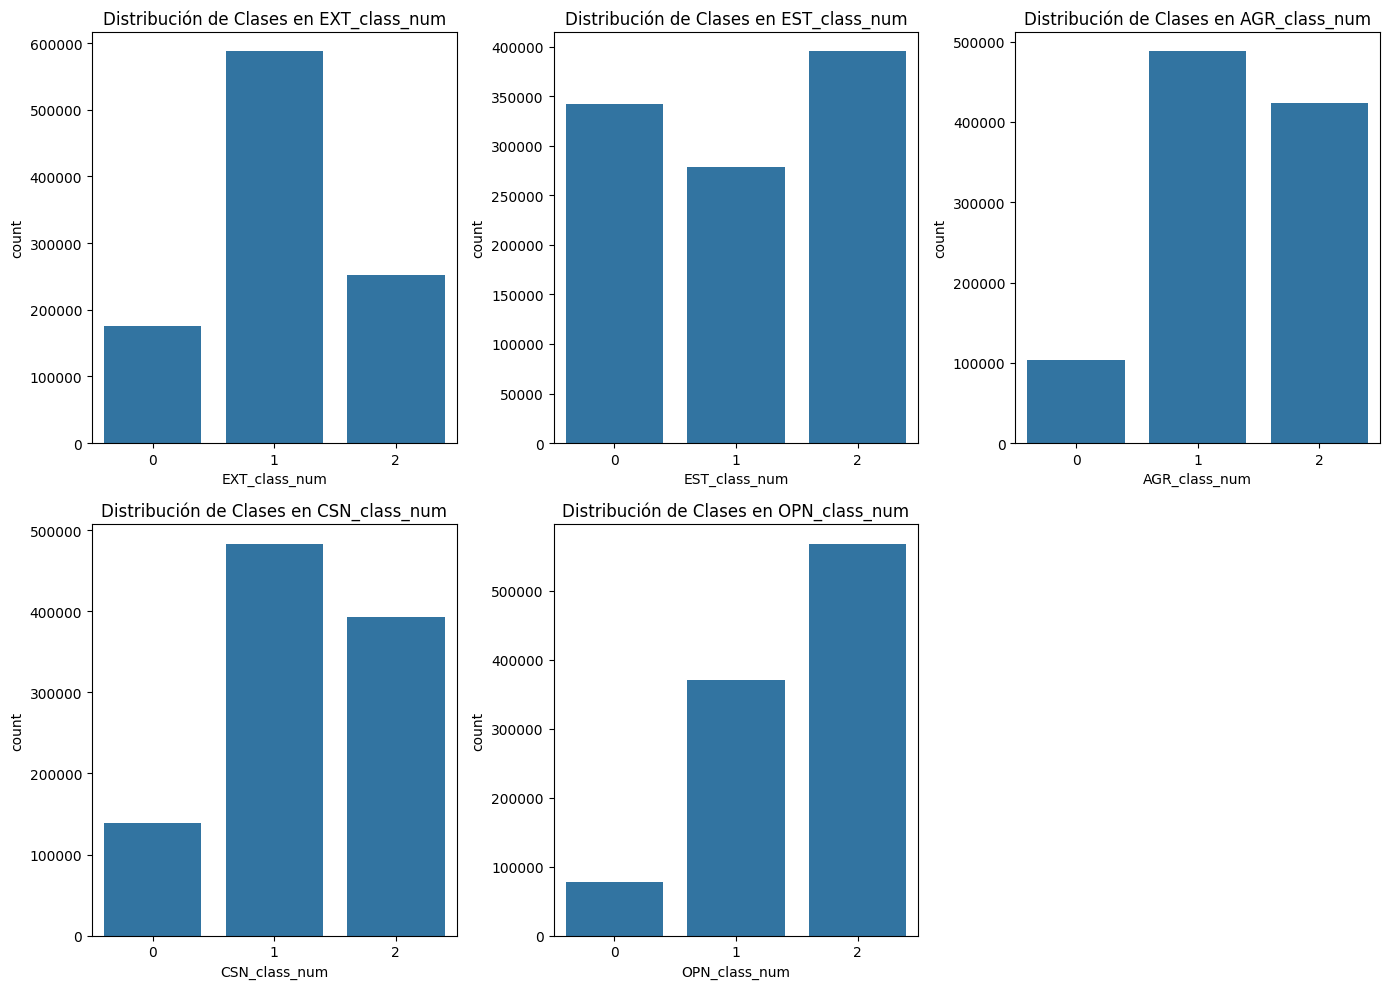

In [ ]:
# Lista de las variables de clase
class_columns = ['EXT_class_num', 'EST_class_num', 'AGR_class_num', 'CSN_class_num', 'OPN_class_num']

# Crear los gráficos en una figura con 2 filas y 3 columnas
plt.figure(figsize=(14, 10))  # Ajusta el tamaño de la figura

# Crear un gráfico para cada clase
for i, column in enumerate(class_columns, 1):
    plt.subplot(2, 3, i)  # Crea una subfigura
    sns.countplot(data=dataset, x=column)
    plt.title(f'Distribución de Clases en {column}')

# Ajusta el layout para que no se solapen los gráficos
plt.tight_layout()
plt.show()

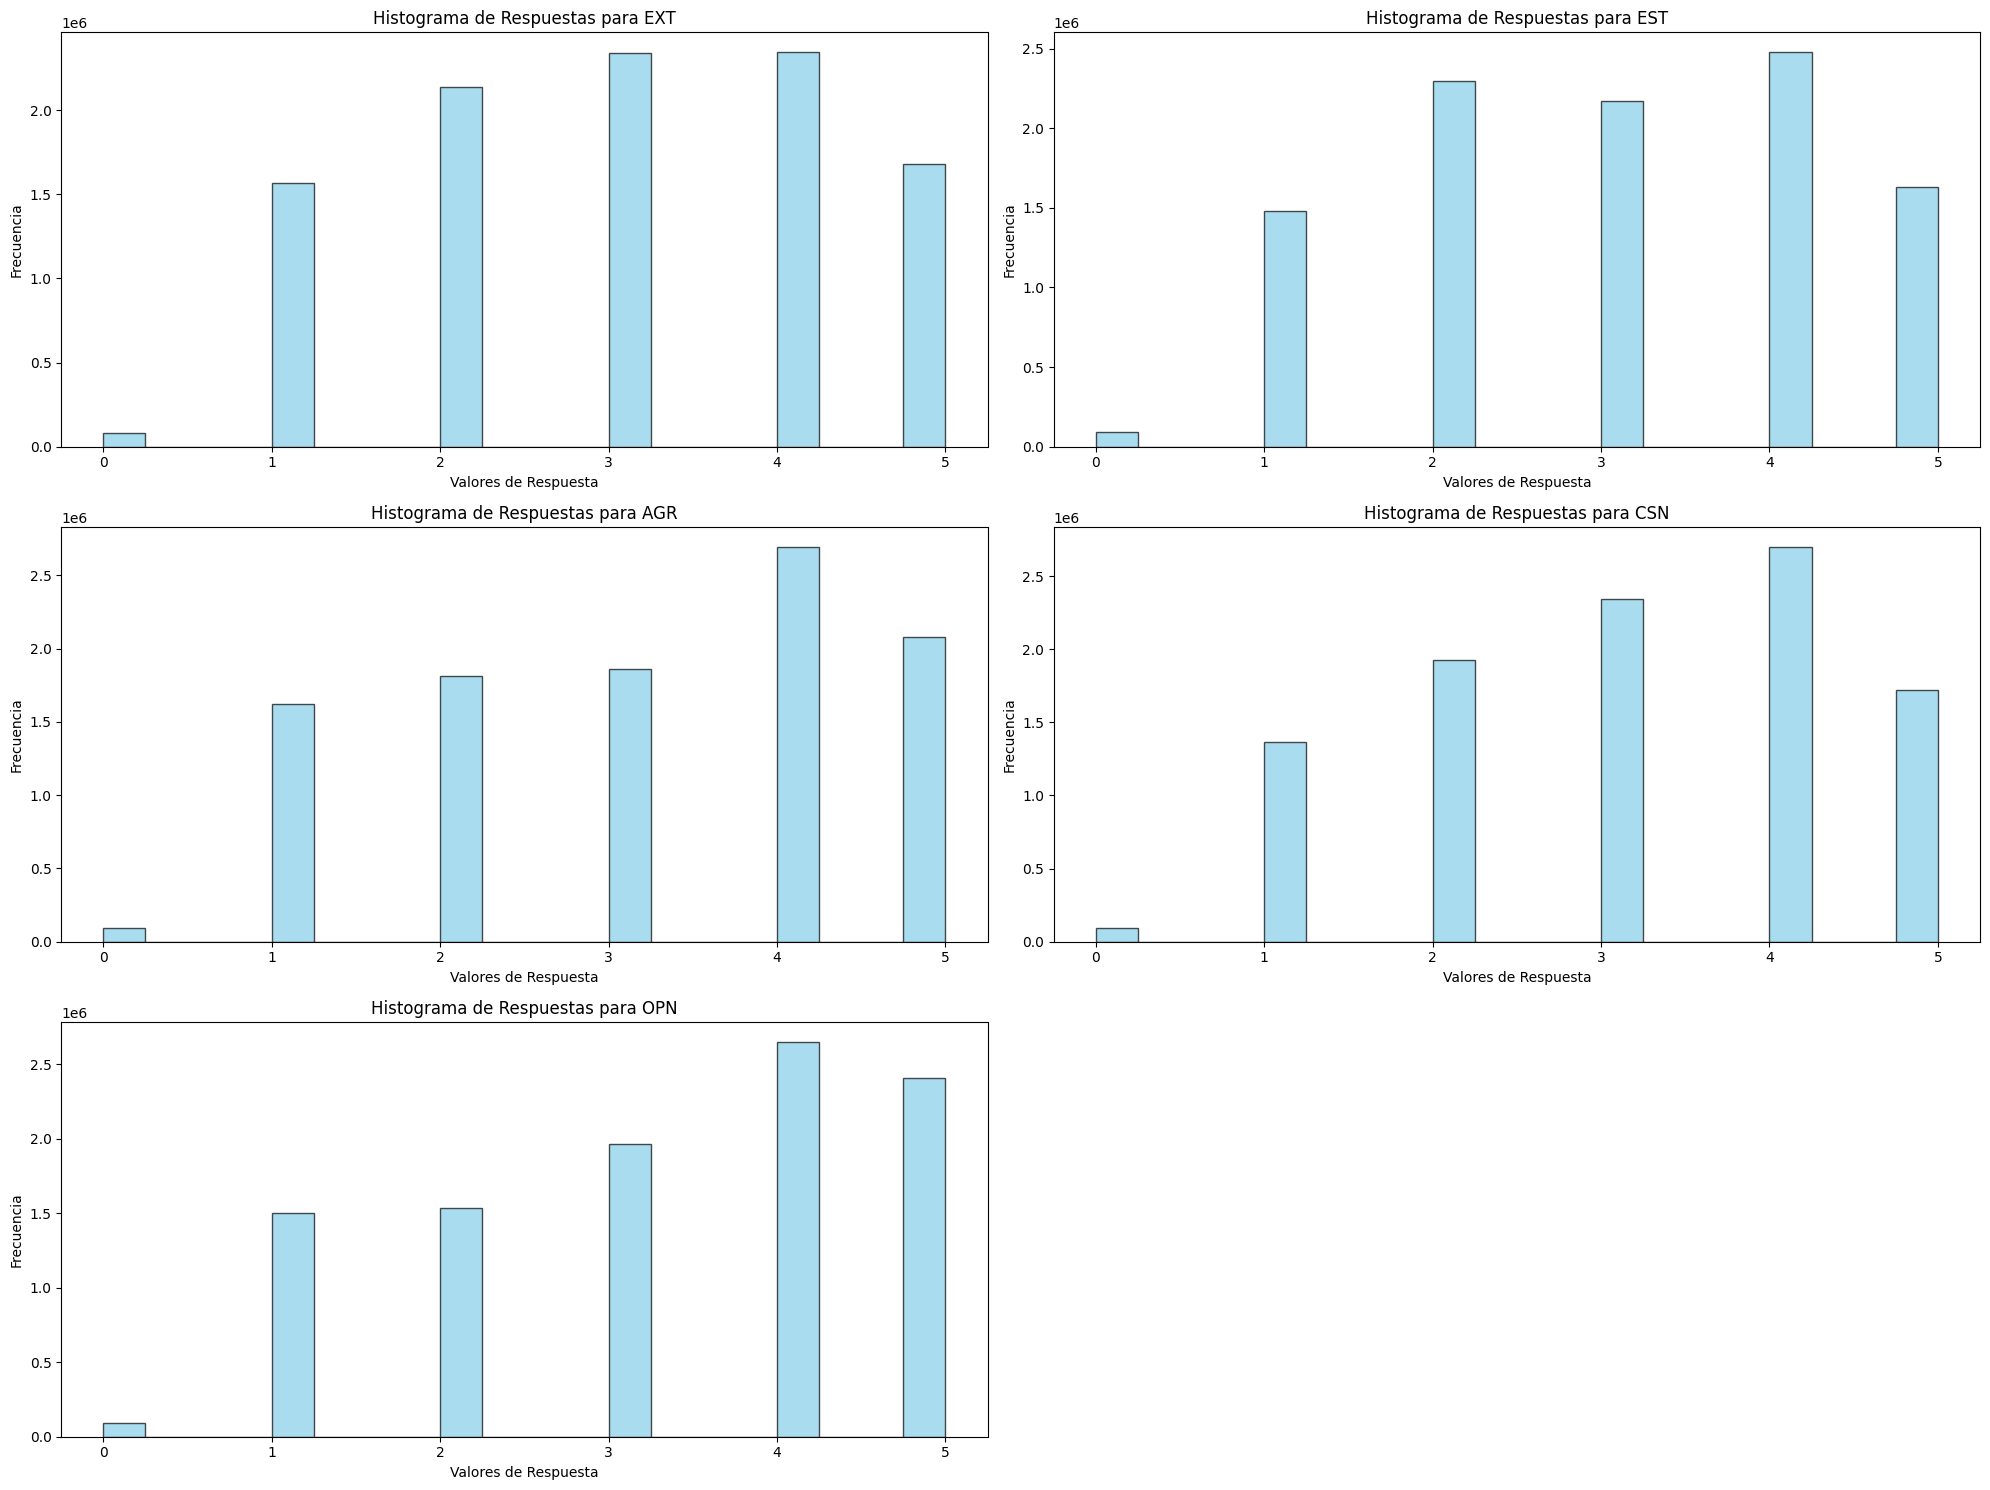

In [ ]:
# Aseguramos que todas las columnas de los rasgos estén seleccionadas
personality_questions = ["EXT1", "EXT2", "EXT3", "EXT4", "EXT5", "EXT6", "EXT7", "EXT8", "EXT9", "EXT10",
                      "EST1", "EST2", "EST3", "EST4", "EST5", "EST6", "EST7", "EST8", "EST9", "EST10",
                      "AGR1", "AGR2", "AGR3", "AGR4", "AGR5", "AGR6", "AGR7", "AGR8", "AGR9", "AGR10",
                      "CSN1", "CSN2", "CSN3", "CSN4", "CSN5", "CSN6", "CSN7", "CSN8", "CSN9", "CSN10",
                      "OPN1", "OPN2", "OPN3", "OPN4", "OPN5", "OPN6", "OPN7", "OPN8", "OPN9", "OPN10"]


# --- 2. Histogramas por bloques de preguntas ---
plt.figure(figsize=(20, 15))

for i, trait in enumerate(['EXT', 'EST', 'AGR', 'CSN', 'OPN'], 1):
    # Filtrar preguntas para el rasgo actual
    questions = [q for q in personality_questions if q.startswith(trait)]
    
    # Crear el histograma
    plt.subplot(3, 2, i)
    dataset[questions].stack().plot(kind='hist', bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de Respuestas para {trait}')
    plt.xlabel('Valores de Respuesta')
    plt.ylabel('Frecuencia')
    
plt.tight_layout()
plt.show()


Podemos ver que las clases están desbalanceadas, cabe mencionar que este desbalanceo por lo general será variable, dependerá del umbral en el que pongamos el límite de cada uno. Debido a este desbalanceo deberemos proceder de distintas formas.

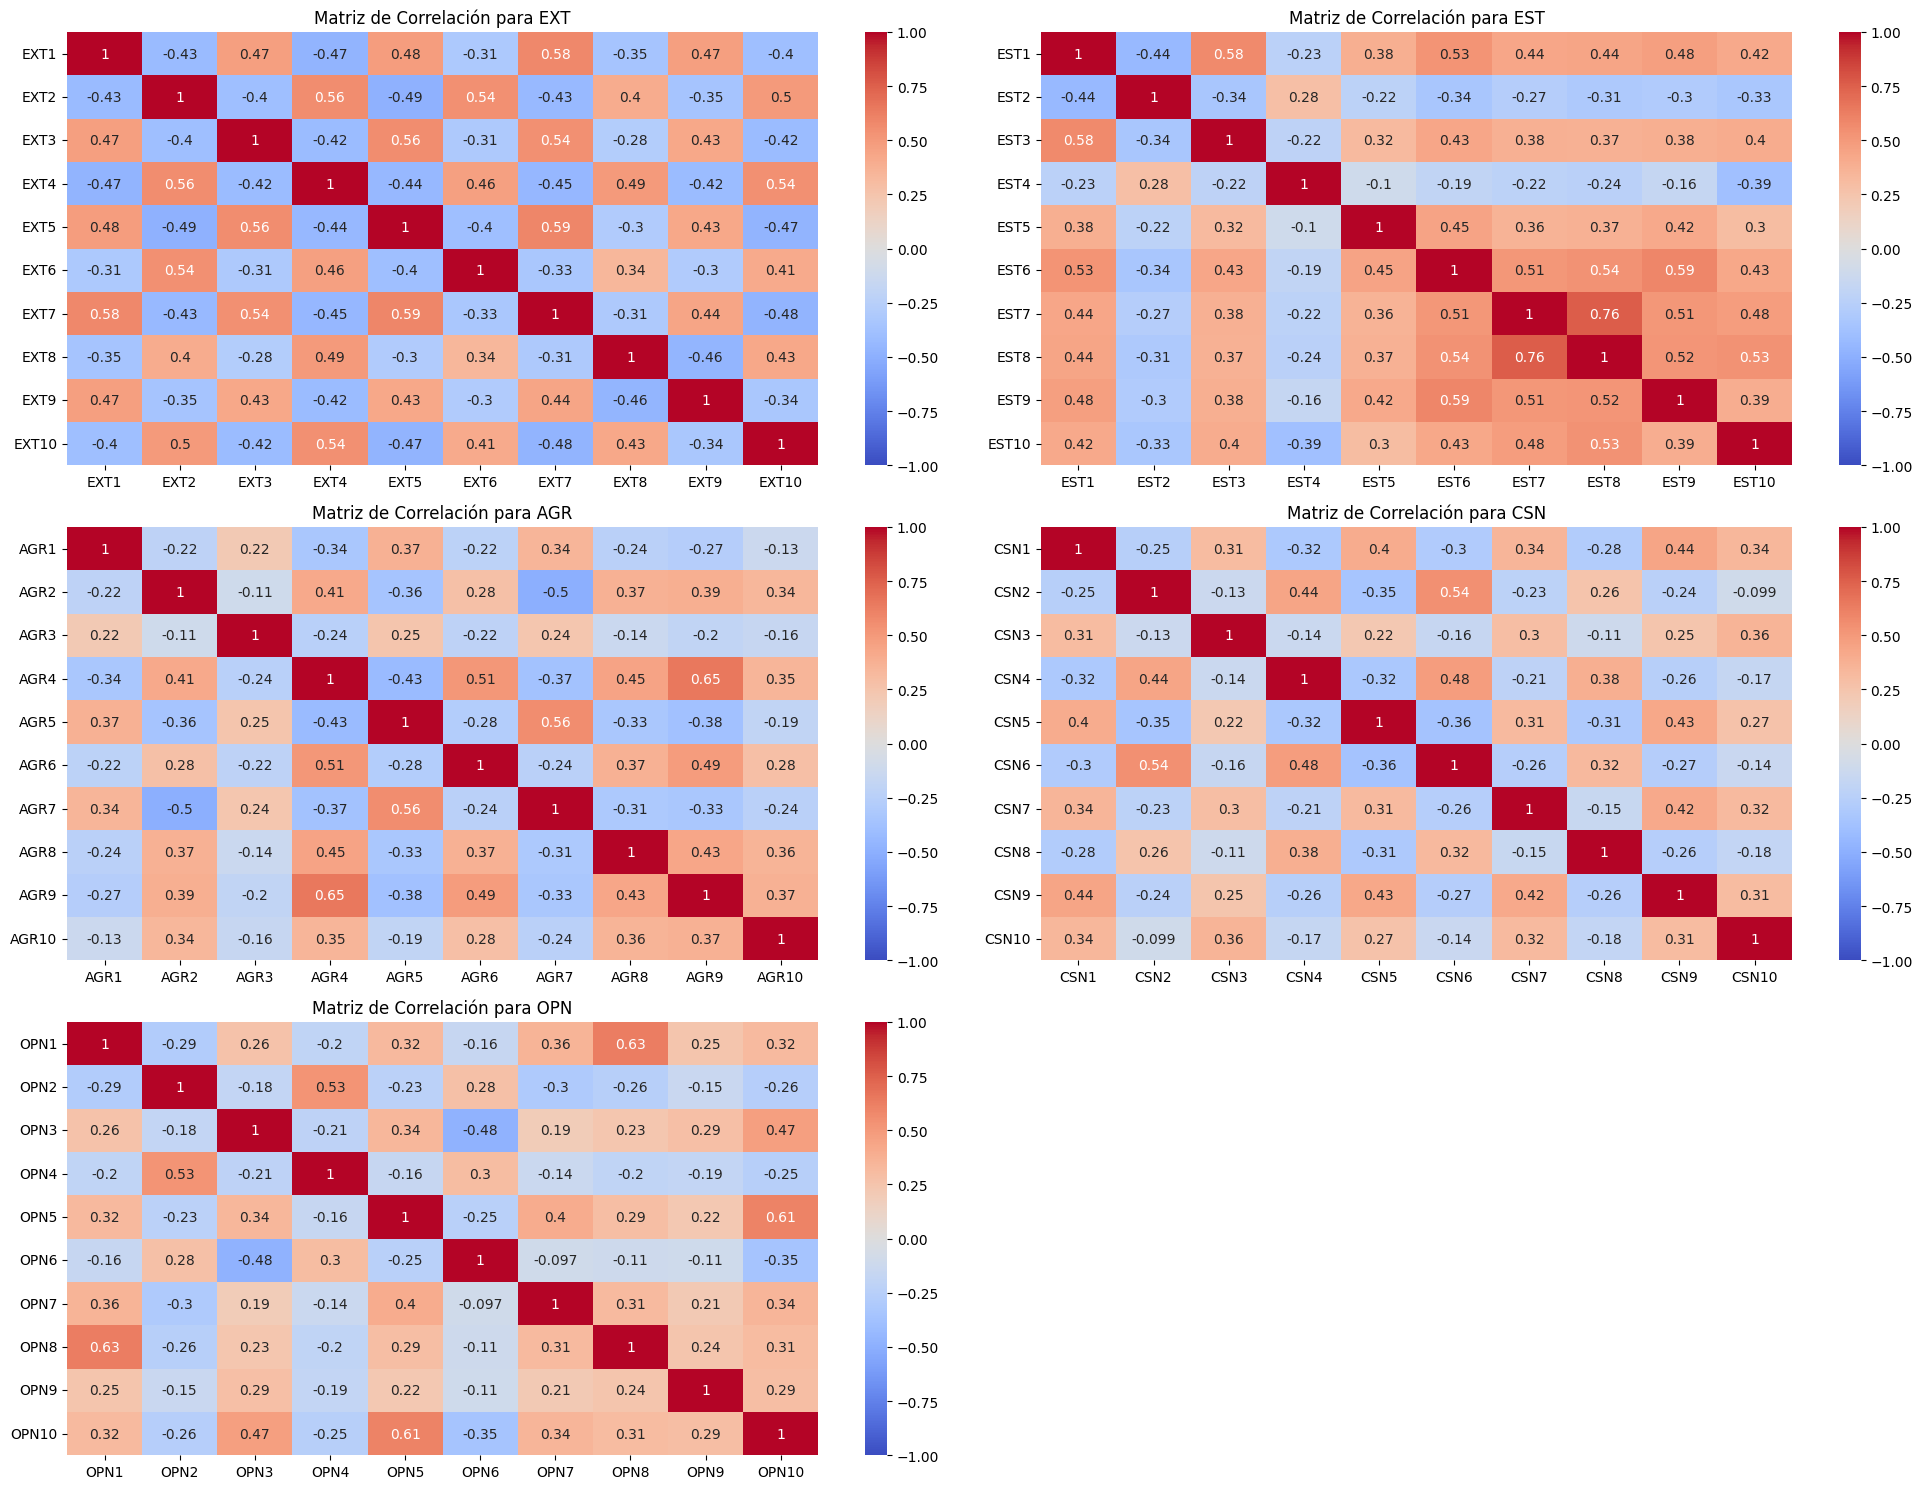

In [ ]:
# --- 1. Correlaciones por bloques de preguntas ---
plt.figure(figsize=(20, 15))
for i, trait in enumerate(['EXT', 'EST', 'AGR', 'CSN', 'OPN'], 1):
    questions = [q for q in personality_questions if q.startswith(trait)]
    corr_matrix = dataset[questions].corr()
    
    plt.subplot(3, 2, i)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Matriz de Correlación para {trait}')
plt.tight_layout()
plt.show()

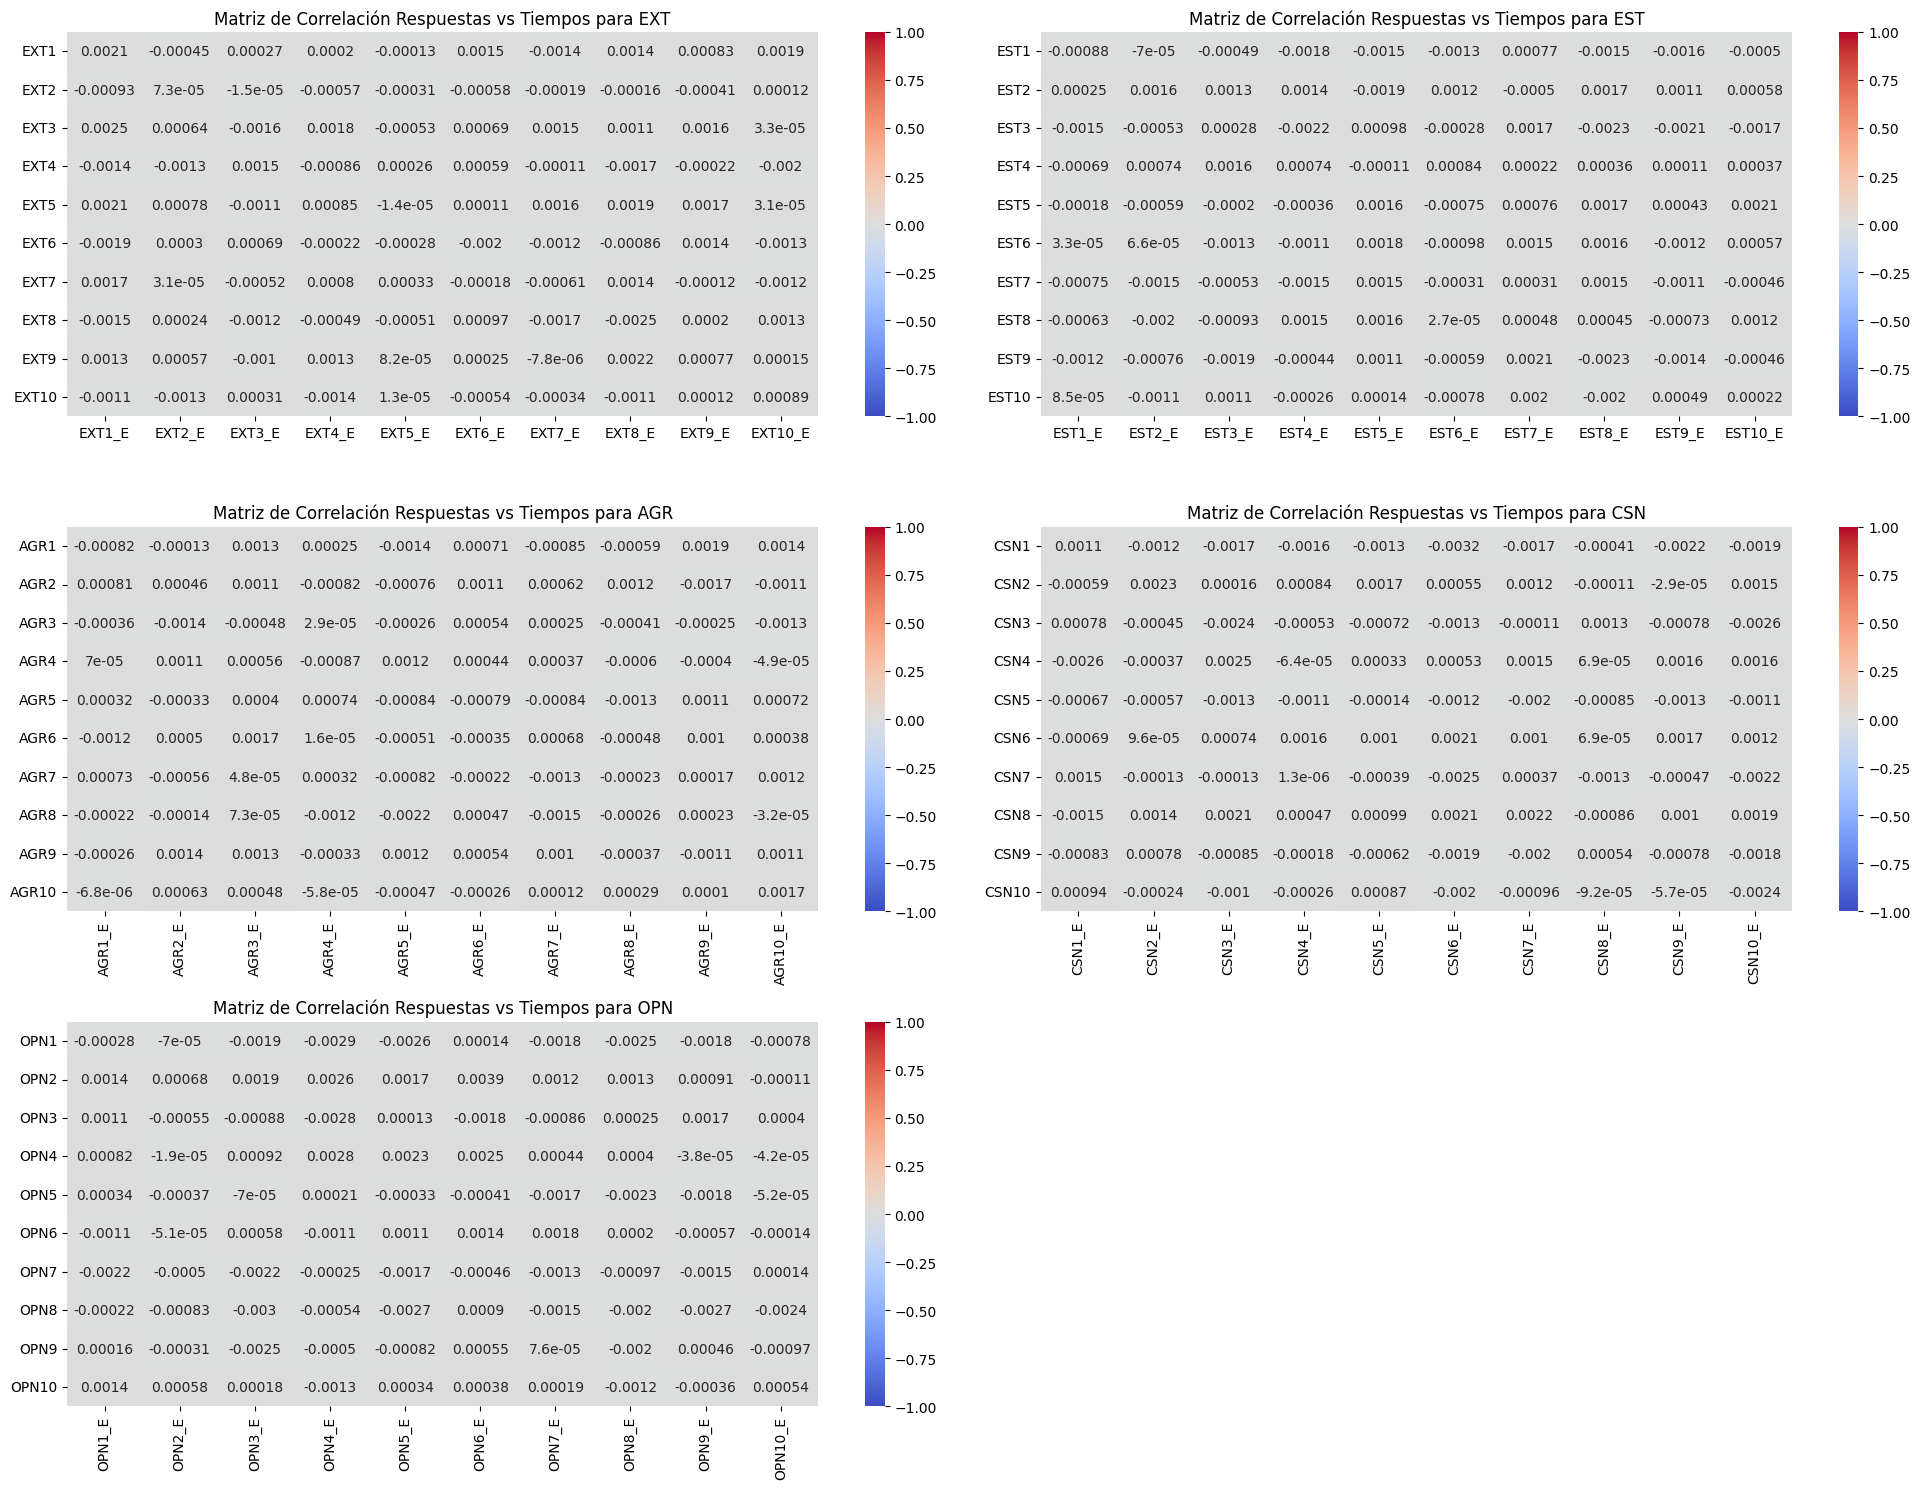

In [ ]:
# --- 1. Correlaciones por bloques de preguntas y tiempos de respuesta ---
plt.figure(figsize=(20, 15))

# Adaptamos para usar las columnas de tiempos de respuesta (EXT1_E, EST1_E, etc.)
for i, trait in enumerate(['EXT', 'EST', 'AGR', 'CSN', 'OPN'], 1):
    # Filtrar preguntas y tiempos de respuesta para el rasgo actual
    questions = [q for q in personality_questions if q.startswith(trait)]
    times = [f"{q}_E" for q in questions]  # Añadimos "_E" para los tiempos
    
    # Aseguramos que las columnas existen en el dataset
    valid_columns = [col for col in times if col in dataset.columns]
    
    # Combinar respuestas y tiempos para el cálculo
    combined_columns = questions + valid_columns
    corr_matrix = dataset[combined_columns].corr()
    
    # Crear el heatmap
    plt.subplot(3, 2, i)
    sns.heatmap(corr_matrix.loc[questions, valid_columns], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Matriz de Correlación Respuestas vs Tiempos para {trait}')
    
plt.tight_layout()
plt.show()


Veiem que les preguntes de cada bloc están correlacionades peró hi ha molt poca correlació entre les variables de resposta amb el seu temps, per tant, no es té clar que el temps que triga una persona en respondre sigui important.

Ara procedim a comparar les diferents mètriques y així poder seleccionar la més adequada.

In [ ]:
# Selecciona las columnas numéricas a normalizar

# NORMALIZAR POR COLUMNAS

columns_to_normalize = ["EXT1_E", "EXT2_E", "EXT3_E", "EXT4_E", "EXT5_E", "EXT6_E", "EXT7_E", "EXT8_E", "EXT9_E", "EXT10_E",
                      "EST1_E", "EST2_E", "EST3_E", "EST4_E", "EST5_E", "EST6_E", "EST7_E", "EST8_E", "EST9_E", "EST10_E",
                      "AGR1_E", "AGR2_E", "AGR3_E", "AGR4_E", "AGR5_E", "AGR6_E", "AGR7_E", "AGR8_E", "AGR9_E", "AGR10_E",
                      "CSN1_E", "CSN2_E", "CSN3_E", "CSN4_E", "CSN5_E", "CSN6_E", "CSN7_E", "CSN8_E", "CSN9_E", "CSN10_E",
                      "OPN1_E", "OPN2_E", "OPN3_E", "OPN4_E", "OPN5_E", "OPN6_E", "OPN7_E", "OPN8_E", "OPN9_E", "OPN10_E",
                      "introelapse", "testelapse", "endelapse", "IPC", "country", "screen_size", "dateload_time"]

# Crear el escalador
scaler = StandardScaler()

# Aplicar fit_transform columna por columna
for col in columns_to_normalize:
    dataset[col] = scaler.fit_transform(dataset[[col]])

X = dataset.drop(columns=['EXT_class_num', 'EST_class_num', 'AGR_class_num', 'CSN_class_num', 'OPN_class_num'])  # Quitamos lo que vamos a predecir

# Dividir el conjunto de datos en 5 regresiones diferentes
y_ext = dataset['EXT_class_num']

"""
y_est = dataset['EST_class_num']
y_agr = dataset['AGR_class_num']
y_csn = dataset['CSN_class_num']
y_opn = dataset['OPN_class_num']
"""

X_train_ext, X_test_ext,y_train_ext, y_test_ext = train_test_split(X,y_ext,test_size=0.3, random_state = 1)

# Aplicamos PCA para reducir la dimensionalidad
pca = PCA(n_components=0.80, random_state = 1)  # Mantener el 90% de la varianza
X_train_pca = pca.fit_transform(X_train_ext)
X_test_pca = pca.transform(X_test_ext)


# Paso 2: Entrenamiento del modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train_ext, y_train_ext)

# Paso 3: Predicción sobre los datos de prueba
y_pred = model.predict(X_test_ext)

# Paso 4: Evaluación con métricas
# Usamos classification_report para obtener varias métricas como precision, recall, f1-score
print(classification_report(y_test_ext, y_pred))

NameError: name 'StandardScaler' is not defined

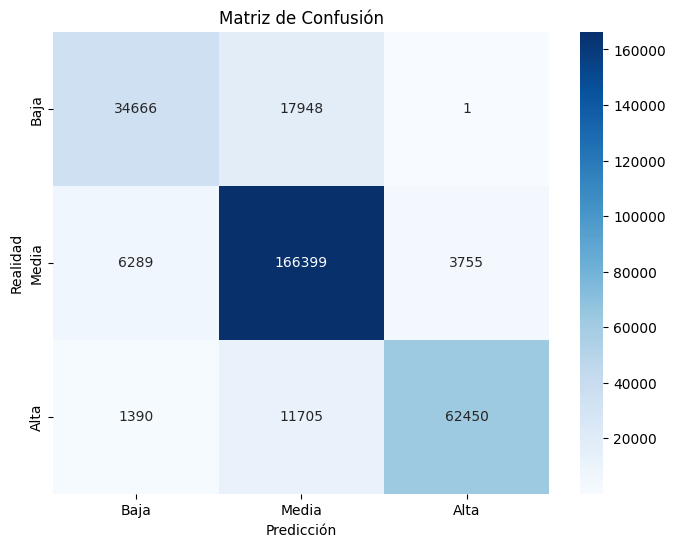

In [ ]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test_ext, y_pred)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Baja", "Media", "Alta"], yticklabels=["Baja", "Media", "Alta"])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

Análisis por clase:

    Clase Baja:
        Correctas: 34,666 instancias fueron clasificadas correctamente como "Baja".
        Errores:
            17,948 instancias fueron mal clasificadas como "Media".
            Solo 1 fue mal clasificada como "Alta".
        Esto sugiere que el modelo tiene una tendencia a confundir algunas instancias de "Baja" con "Media".

    Clase Media:
        Correctas: 166,399 instancias fueron clasificadas correctamente.
        Errores:
            6,289 fueron mal clasificadas como "Baja".
            3,755 fueron mal clasificadas como "Alta".
        El modelo tiene un buen desempeño con esta clase, pero aún presenta algunos errores.

    Clase Alta:
        Correctas: 62,450 instancias fueron clasificadas correctamente.
        Errores:
            1,390 fueron mal clasificadas como "Baja".
            11,705 fueron mal clasificadas como "Media".
        Hay una tendencia notable a confundir "Alta" con "Media".

Conclusiones generales:

    Desempeño general:
        El modelo parece funcionar bien en general, con muchas instancias correctamente clasificadas (alta densidad en la diagonal principal).
        Sin embargo, las clases "Baja" y "Alta" tienen más confusiones con la clase "Media".

    Errores más comunes:
        Baja ↔ Media y Alta ↔ Media son los errores más frecuentes.
        Esto podría deberse a que las características de las clases "Media" están más cerca de las otras dos en el espacio de características.

    Recomendaciones para mejorar:
        Analizar las características: Revisa las variables que diferencian estas clases, especialmente entre "Media" y las otras dos.
        Rebalancear clases: Si las clases no están equilibradas en el conjunto de entrenamiento, podría estar afectando el rendimiento.
        Modelos más complejos: Prueba modelos que manejen mejor las fronteras no lineales entre clases (p. ej., Gradient Boosting, SVM con kernels no lineales).

In [ ]:
def calculate_f1_score(name, model, X_train, y_train, X_test, y_test):
    lr = model
    lr.fit(X_train,y_train)

    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    f1_score1 = f1_score(y_train, y_pred_train, average = 'weighted')
    f1_score2 = f1_score(y_test, y_pred_test, average = 'weighted')

    print (name, "f1_train:", round(f1_score1,5))
    print (name, "f1_test:", round(f1_score2,5))
    return f1_score2

def f1_score_comparison(models, f1_scores):
    plt.figure(figsize=(10, 6))
    plt.barh(models, f1_scores, color='skyblue')

    plt.xlabel('F1-Score')
    plt.title('Comparació de F1-Score entre Models')

    for i, v in enumerate(f1_scores):
        plt.text(v + 0.01, i, f"{v:.2f}", va='center')

    plt.tight_layout()
    plt.show()

In [ ]:
models=['Logistic Regression', "Decision Tree", 'Random Forest', 'KNN', 'SVM', 'Gradient Boosting']
f1_scores=[]

In [ ]:
f1=calculate_f1_score("LogisticRegression", LogisticRegression(fit_intercept = True), X_train_ext, y_train_ext, X_test_ext, y_test_ext)
f1_scores.append(f1)

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression f1_train: 0.79309
LogisticRegression f1_test: 0.79182


In [ ]:
f1=calculate_f1_score("Decision Tree", DecisionTreeClassifier(), X_train_ext, y_train_ext, X_test_ext, y_test_ext)
f1_scores.append(f1)

In [ ]:
f1=calculate_f1_score("Random Forest Classifier", RandomForestClassifier(), X_train_ext, y_train_ext, X_test_ext, y_test_ext)
f1_scores.append(f1)

Random Forest Classifier f1_train: 1.0
Random Forest Classifier f1_test: 0.82995


In [ ]:
f1=calculate_f1_score("KNeighbors Classifier", KNeighborsClassifier(), X_train_ext, y_train_ext, X_test_ext, y_test_ext)
f1_scores.append(f1)

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KNeighbors Classifier f1_train: 0.7627
KNeighbors Classifier f1_test: 0.6559


In [ ]:
f1=calculate_f1_score("SVC", SVC(), X_train_ext, y_train_ext, X_test_ext, y_test_ext)
f1_scores.append(f1)

In [ ]:
f1_scores.append(0.82237)
f1_scores.append(0.82995)
f1_scores.append(0.6559)
f1=calculate_f1_score("Gradient Boosting Classifier", GradientBoostingClassifier(), X_train_ext, y_train_ext, X_test_ext, y_test_ext)
f1_scores.append(f1)

In [ ]:
f1_score_comparison(models, f1_scores)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_ext, y_train_ext, cv = StratifiedKFold(n_splits = 5), scoring = 'f1')
    print(f'{name}: F1 score mitjana en CV = {scores.mean():.4f}')
